<a href="https://colab.research.google.com/github/zedeme/Neural-Network-Without-Libraries/blob/main/g-Neural_Network_Without_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Network without neural network's library**

---

In [1]:
from sklearn.datasets import make_gaussian_quantiles
import seaborn as sns
import numpy as np

### **Making the dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


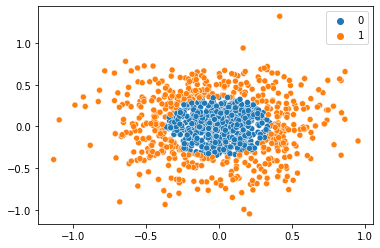

In [3]:
N = 1000

gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2,
                                             shuffle=True,
                                             random_state=None)

X, Y = gaussian_quantiles
Y = Y[:,  np.newaxis]

sns.scatterplot(X[:,0], X[:,1], hue=Y[:,0])

### **Params initializator**

In [4]:
def initialize_parameters_deep(layer_dim):
  parameters = {}
  L = len(layer_dim)

  for l in range(0,L-1):
    parameters["W" + str(l+1)] = (np.random.rand(layer_dim[l], layer_dim[l+1]) * 2) - 1
    parameters["b" + str(l+1)] = (np.random.rand(1,layer_dim[l+1]) * 2) - 1
  return parameters

In [5]:
layer = initialize_parameters_deep([2,4,8,8,4,2])

In [6]:
X.shape

(1000, 2)

In [7]:
layer["W1"].shape

(2, 4)

In [8]:
X@layer["W1"]

array([[-0.31167772, -0.59408635,  0.11679239,  0.32552207],
       [-0.13471168, -0.59127045,  0.26905203,  0.17132818],
       [ 0.09238835, -0.02485397,  0.096691  , -0.07808902],
       ...,
       [-0.33259044,  0.05064098, -0.32270591,  0.28467012],
       [ 0.18206221, -0.70888392,  0.62174731, -0.09345049],
       [ 0.16866582,  0.05792715,  0.10902027, -0.15202084]])

### **Activations Functions**

In [9]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:    
        return np.maximum(0,x)

In [10]:
x = np.linspace(10, -10, 100)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


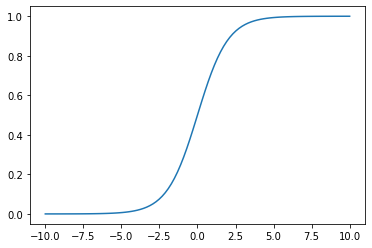

In [11]:
sns.lineplot(x, sigmoid(x))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


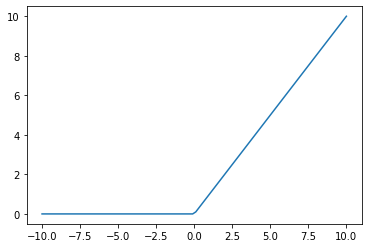

In [12]:
sns.lineplot(x, relu(x))

### **Loss Function**

In [13]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

### **Train Function**

In [24]:
def train(X_data, lr, params, training=True):
  params['A0'] = X_data

  params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
  params['A1'] = relu(params['Z1'])

  params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']

  if training:
        ## Backpropagation
    
        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])
        
        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])
        
        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])


        ## Gradinet Descent:
           
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr
        
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr
        
        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr
    
  return output


### **Training and testing**

In [58]:
layer_dim = [2,8,8,1]
params = initialize_parameters_deep(layer_dim)
errors = []

for _ in range(80000):
  output = train(X, 0.00001, params)
  if _ % 25 == 0:
    print(mse(Y, output))
    errors.append(mse(Y, output))

0.304957927077117
0.30458200054338447
0.3042124843844935
0.30384907280830475
0.303491504305778
0.30313949658172545
0.30279284895867686
0.30245118761213824
0.30211422202514554
0.30178170683495215
0.3014534357345678
0.30112925402337654
0.3008088343538343
0.3004919646409159
0.300178453830992
0.2998682269964508
0.2995609619510601
0.29925659066276555
0.2989548872516449
0.29865562403043056
0.29835865655030475
0.2980639067851464
0.2977711149529962
0.2974801402982978
0.2971909655103829
0.2969034785979686
0.2966174461513164
0.2963327910729432
0.29604950504448435
0.29576727477573406
0.295485993495843
0.29520554801491666
0.2949259099369582
0.2946469754836467
0.2943686900800916
0.29409095677122987
0.2938135815506266
0.2935365375476388
0.2932598266165652
0.2929833154070181
0.29270702229156076
0.292430861212625
0.2921547648811058
0.2918786955087148
0.29160261706767454
0.29132645009699604
0.29105018684720535
0.2907737596982443
0.29049719643569066
0.2902205013156856
0.2899435658218855
0.28966637634499

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


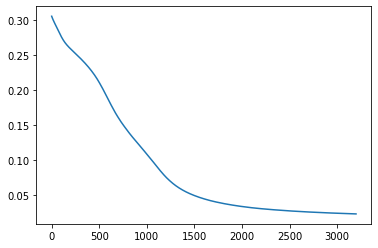

In [59]:
sns.lineplot(range(len(errors)), errors)

In [60]:
t = output[:,0] > 0.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


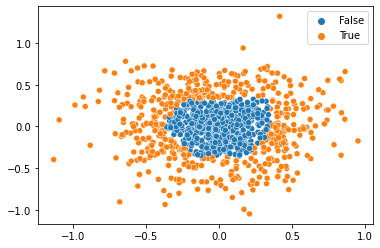

In [61]:
sns.scatterplot(X[:,0], X[:,1], hue=t)

In [62]:
data_test = (np.random.rand(1000,2) * 2) - 1

y = train(data_test, 0.00001, params, training=False)

In [63]:
t = y[:,0] > 0.5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


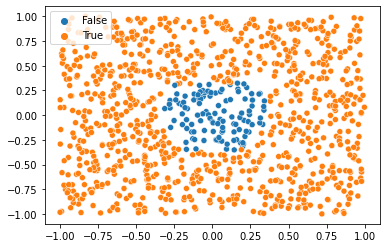

In [64]:
sns.scatterplot(data_test[:,0], data_test[:,1], hue=t)